
# Homework 3 
---
 #### submited by :
##### Gil sherman 318521835
##### Tal Aya Shefi 316137694

In [67]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageEnhance, ImageFilter
from skimage import data, segmentation, color

# pytorch
import torch 
import torch.nn as nn
import torchvision

import cv2


# import datasets in torchvision
import torchvision.datasets as datasets
# import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import utils

import scipy.io
import os


**section 2** - deep learning-based method for segmentation 

(based on tirgul)

In [68]:
# download and load the pre-trained model
model = torch.hub.load('pytorch/vision:v0.5.0', 'deeplabv3_resnet101', pretrained=True)
# put in inference mode
model.eval();

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.5.0


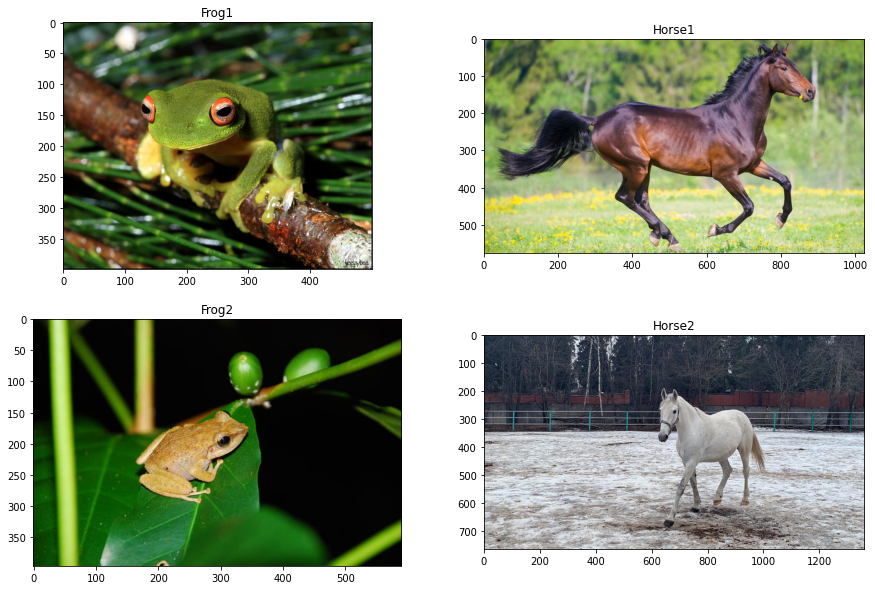

In [69]:
# define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# load an image
filename = "./data/frogs/frog1.jpg"
# filename = "./horses/horse1.png"

frogNames = ["Frog1", "Frog2"]
frogImages = []


frogImages.append(Image.open("./data/frogs/frog1.jpg"))
frogImages.append(Image.open("./data/frogs/frog2.jpg"))

horseNames = ["Horse1", "Horse2"]
horseImages = []

horseImages.append(Image.open("./data/horses/horse1.png"))
horseImages.append(Image.open("./data/horses/horse2.jpg"))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(2):
  axes[i, 0].imshow(frogImages[i])
  axes[i, 0].set_title(frogNames[i])
for j in range(2):
  axes[j, 1].imshow(horseImages[j])
  axes[j, 1].set_title(horseNames[j])

In [70]:
def grabcut(img, rectLim):

    mask = np.zeros(img.shape[:2],np.uint8)   # img.shape[:2] = (413, 620)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)


# this modifies mask 
    cv2.grabCut(img,mask,rectLim,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# adding additional dimension for rgb to the mask, by default it gets 1
# multiply it with input image to get the segmented image
    img_cut = img*mask2[:,:,np.newaxis]
    return img_cut 

In [ ]:
# classic clustering with grabcut:
# first, define the rellevant rectangles (extracted manually)
frogrects = [(100, 78, 330, 265), (155, 122, 203, 171)]
horserects = [ (31, 21, 882, 541), (551, 182, 413, 442)]

plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('GrabCut Segmentation', fontsize=15);
for i in range(2):
  grabedFrog = grabcut(np.array(frogImages[i]), frogrects[i])
  axes[i, 0].imshow(grabedFrog)
  axes[i, 0].set_title(frogNames[i])
for j in range(2):
  grabedHorse = grabcut(np.array(horseImages[j]), horserects[j])
  axes[j, 1].imshow(grabedHorse)
  axes[j, 1].set_title(horseNames[j])
  plt.setp(axes, xticks=[], yticks=[])


In [ ]:
input_image = Image.open(filename)


# define the pre-processing steps
# image->tensor, normalization
preprocess = transforms.Compose([
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
model.eval
model = model.to(device)
 # create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Deep Learning Segmentation', fontsize=15);
for id, image in enumerate(frogImages):
  # perform pre-processing
  input_tensor = preprocess(image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch of size 1 as expected by the model

  # send to device

  input_batch = input_batch.to(device)
  with torch.no_grad():
    output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)
  # plot the semantic segmentation predictions of 21 classes in each color
  r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(image.size)
  r.putpalette(colors)
  # plot
  #fig = plt.figure(figsize=(15,15))
  #ax = fig.add_subplot(111)
  #ax.imshow(r)
  #ax.set_axis_off()
  mask = (np.array(r) > 0)
  ax[id, 0].imshow(mask[:,:,np.newaxis] * np.array(image))
  ax[id, 0].set_title(frogNames[id])
  ax[id, 0].set_axis_off()

for id, image in enumerate(horseImages):
  # perform pre-processing
  input_tensor = preprocess(image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch of size 1 as expected by the model

  # send to device

  input_batch = input_batch.to(device)
  with torch.no_grad():
    output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)
  # plot the semantic segmentation predictions of 21 classes in each color
  r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(image.size)
  r.putpalette(colors)
  # plot
  #fig = plt.figure(figsize=(15,15))
  #ax = fig.add_subplot(111)
  #ax.imshow(r)
  #ax.set_axis_off()
  mask = (np.array(r) > 0)
  ax[id, 1].imshow(mask[:,:,np.newaxis] * np.array(image))
  ax[id, 1].set_title(frogNames[id])
  ax[id, 1].set_axis_off()

In [ ]:
#new we import our own images
# load an image
filename = "./frogs/frog1.jpg"
# filename = "./horses/horse1.png"

ourNames = ["Image 1", "Image2", "Image3"]
ourImages = []


ourImages.append(Image.open("./my_data/image1.jpg"))
ourImages.append(Image.open("./my_data/image2.jpg"))
ourImages.append(Image.open("./my_data/image3.jpg"))


fig, axes = plt.subplots(1, 3, figsize=(15, 10))

for i in range(3):
  axes[i].imshow(ourImages[i])
  axes[ i].set_title(ourNames[i])


In [ ]:
# classic clustering with grabcut:
# first, define the rellevant rectangles (extracted manually)
ourrects = [(50, 50, 1000, 1450), (1500, 250, 1800, 1400), (100, 100, 900, 620)]


plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('GrabCut Segmentation', fontsize=15);
for i in range(3):
  grabedImage = grabcut(np.array(ourImages[i]), ourrects[i])
  axes[i].imshow(grabedImage)
  axes[i].set_title(ourNames[i])

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('Deep Learning Segmentation', fontsize=15);
for id, image in enumerate(ourImages):
  # perform pre-processing
  input_tensor = preprocess(image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch of size 1 as expected by the model

  # send to device

  input_batch = input_batch.to(device)
  with torch.no_grad():
    output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)
  # plot the semantic segmentation predictions of 21 classes in each color
  r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(image.size)
  r.putpalette(colors)
  # plot
  #fig = plt.figure(figsize=(15,15))
  #ax = fig.add_subplot(111)
  #ax.imshow(r)
  #ax.set_axis_off()
  mask = (np.array(r) > 0)
  ax[id].imshow(mask[:,:,np.newaxis] * np.array(image))
  ax[id].set_title(ourNames[id])
  ax[id].set_axis_off()


In [ ]:

sheep = Image.open("./data/sheep.jpg")




plt.imshow(sheep)
plt.title("sheep")
_ = plt.axis('off')

In [ ]:
googleModel = torchvision.models.googlenet(pretrained=True, progress=True)
googleModel.eval();
import ast
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


input_tensor = preprocess(sheep)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch of size 1 as expected by the model


pred = googleModel(input_batch).argmax().item()

  # send to device

file = open("data/imagenet1000_clsidx_to_labels.txt", "r")
readFile = file.read()
labels_set = ast.literal_eval(readFile)
file.close()

# get label of prediction:
label = labels_set[pred]
print("Prediction is: " +label)


In [ ]:

input_batch = input_batch.to(device)
with torch.no_grad():
  output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)
  # plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(sheep.size)
r.putpalette(colors)

mask = (np.array(r) > 0)

tmp = mask[:,:,np.newaxis] * np.array(sheep)
plt.imshow(mask[:,:,np.newaxis] * np.array(sheep))
plt.title("sheep segmented")
_ = plt.axis('off')

In [ ]:
background = Image.open("./data/beach.jpg")
background_mask  = (np.array(r) == 0)

np_mask = Image.fromarray(mask)
background.paste(sheep, (200, 200), np_mask)
#plt.imshow(mask[:,:,np.newaxis] * np.array(sheep) + background_mask[:,:,np.newaxis] *background)
plt.figure()
plt.imshow(background)
plt.title("sheep in beach")
plt.axis('off')

#background.paste(sheep, (0, 0), sheep)
#background.show()

In [ ]:


input_tensor = preprocess(background)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch of size 1 as expected by the model


pred = googleModel(input_batch).argmax().item()

  # send to device

file = open("data/imagenet1000_clsidx_to_labels.txt", "r")
readFile = file.read()
labels_set = ast.literal_eval(readFile)
file.close()

# get label of prediction:
label = labels_set[pred]
print("Prediction is: " +label)

# New Section